# Random Walks & Diffusion - a JuPyter story

Diffusion is defined as the random bouncing of a particle, brought on by the vibration of molecules. Suppose we have a single particle to track, and it exists on a line:
![title](img/rw.png)
At each "interval of time" $a_t$ here, it interacts randomly with the molecules in the solution; We can write   Increasing the heat makes it jump further, but no more randomly. 

This situation is indentical in form to what mathematicians refer to as a "random walk." A random walk is a function that considers a point that jumps randomly up or down as $t$ increases. Let us write a function to simulate such a thing:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

def random_walk(n_steps=1000):
    step_list = [(0)]
    up_down_vals = [-1,1]
    for n in range(1,n_steps):
        step_list.append(step_list[n-1] + random.choice(up_down_vals))
    return step_list

This function, as it defaults to, returns the set of y-values making up a single walk. We take a certain number n_steps of steps forwards, and at each point we choose to increase or decrease by 1 randomly. Let us plot a single walk, where we take 10 steps forward.

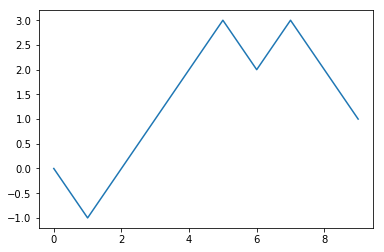

In [16]:
plt.plot(range(10), random_walk(10))

# Analyzing the random walk with Python

Now let us do something unexpected that'll make complete sense once we get the result: make a histogram of where a large quantity of random walks ends. For reference, a large quantity of walks may look like

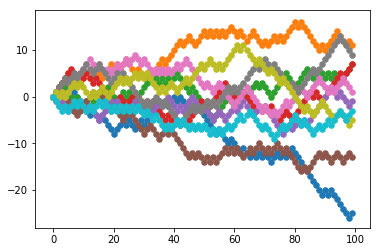

In [30]:
n_steps = 100
n_walks = 10
walk_list = []

for walk in range(n_walks):
    this_walk = random_walk(n_steps)
    walk_list.append(this_walk)
    plt.scatter( range(n_steps), [entry for entry in this_walk], s= 30 )

So let us walk 10000 walks, grab the final value after 1000 steps, and plot a histogram of those values:

(array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          9.00000000e+00,   1.00000000e+01,   2.70000000e+01,
          6.80000000e+01,   1.08000000e+02,   1.75000000e+02,
          2.48000000e+02,   3.80000000e+02,   4.78000000e+02,
          8.86000000e+02,   8.65000000e+02,   9.49000000e+02,
          1.02500000e+03,   9.90000000e+02,   8.95000000e+02,
          9.33000000e+02,   6.05000000e+02,   4.96000000e+02,
          3.43000000e+02,   2.11000000e+02,   1.44000000e+02,
          9.20000000e+01,   3.00000000e+01,   1.50000000e+01,
          1.00000000e+01,   3.00000000e+00,   2.00000000e+00]),
 array([-131.        , -122.66666667, -114.33333333, -106.        ,
         -97.66666667,  -89.33333333,  -81.        ,  -72.66666667,
         -64.33333333,  -56.        ,  -47.66666667,  -39.33333333,
         -31.        ,  -22.66666667,  -14.33333333,   -6.        ,
           2.33333333,   10.66666667,   19.        ,   27.33333333,
          35.66666667,   44.        , 

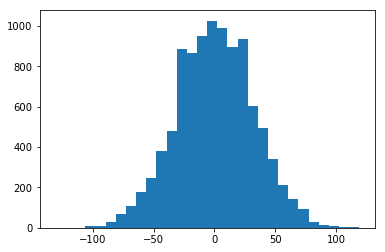

In [78]:
n_steps = 1000
n_walks = 10000
walk_final_list = []

for walk in range(n_walks):
    this_walk = random_walk(n_steps)
    walk_final_list.append(this_walk[n_steps-1])

plt.hist(walk_final_list,30)

Now this looks very similar to a Gaussian, a function of the form $f(x) = e^{-x^2}$: 

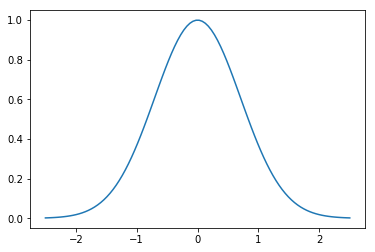

In [66]:
plt.plot(np.linspace(-2.5,2.5,100),[np.exp(-x**2) for x in np.linspace(-2.5,2.5,100)])

Let's perform a similar histogram of a random walk that may be more likely to go one direction than the other; a 75% chance of going up will work. First define the function:

In [70]:
def distorted_walk(n_steps=1000,p=0.5):
    step_list = [(0)]
    up_down_vals = [-1,1]
    for n in range(1,n_steps):
        if random.random() < p:
            step_list.append(step_list[n-1]-1)
        else:
            step_list.append(step_list[n-1]+1)
    return step_list

And plot the histogram where $p = 0.25$ to represent a 25% chance of going down:

(array([   1.,    1.,    4.,    4.,    1.,    4.,    3.,    8.,    8.,
           4.,    8.,   12.,   16.,   18.,   11.,   21.,   25.,   34.,
          35.,   37.,  115.,   54.,   61.,   89.,   89.,  103.,  104.,
         108.,  113.,  139.,  159.,  156.,  177.,  188.,  209.,  219.,
         250.,  248.,  225.,  257.,  565.,  273.,  255.,  299.,  278.,
         276.,  299.,  301.,  284.,  265.,  283.,  271.,  262.,  245.,
         231.,  197.,  197.,  195.,  161.,  185.,  303.,  123.,  124.,
         112.,  110.,   69.,   72.,   66.,   61.,   48.,   38.,   38.,
          31.,   30.,   23.,   27.,   16.,   11.,   11.,   12.,   17.,
           8.,    0.,    1.,    1.,    2.,    3.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([ 405. ,  407.1,  409.2,  411.3,  413.4,  415.5,  417.6,  419.7,
         421.8,  423.9,  426. ,  428.1,  430.2,  432.3,  434.4,  436.5,
         438.6,  440.7,  442.8,  444.9,  447. ,  449.1,  451.2,  4

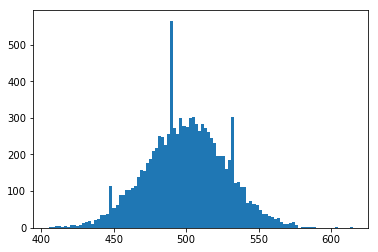

In [75]:
n_steps = 1000
n_walks = 10000
distorted_final_list = []

for walk in range(n_walks):
    this_walk = distorted_walk(n_steps,0.25)
    distorted_final_list.append(this_walk[n_steps-1])

plt.hist(distorted_final_list,100)

Of course, notice that this histogram is identical to the original, but has been shifted right by 500 units. 

Now is a valid time to introduce the idea of the probability distribution function (PDF) now that we've seen that the histograms trend to certain functions.

# The Probability Distribution Function (PDF)

The probability distribution is a term given to functions that represent the (and I apologise for the long chain of words) "relative probability per unit length."

An example will this idea clearer: suppose we have a function that is equally likely to return any point in the range $[0,1]$, then it has the PDF $y = 1 \text{ if } 0 \leq x \geq 1$ and $y = 0 \text{ else }$.

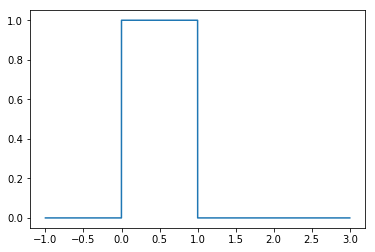

In [87]:
plt.plot([-1,-0.001,0,1,1.001,2,3],[0,0,1,1,0,0,0])

Every value in the range has an equal chance of being drawn, but the chance of any single value being drawn is $\frac{1}{\infty} = 0$, since there are infinite values in the range, and thus infinite choices.

Now suppose we wanted to write a probability distribution for a sum of random variables on the range $[0,1]$; Let's make a histogram for this case and see if we notice anything:

(array([  30.,   68.,  108.,  113.,  151.,  182.,  127.,  105.,   73.,   43.]),
 array([ 0.06017624,  0.24639888,  0.43262152,  0.61884416,  0.8050668 ,
         0.99128944,  1.17751209,  1.36373473,  1.54995737,  1.73618001,
         1.92240265]),
 <a list of 10 Patch objects>)

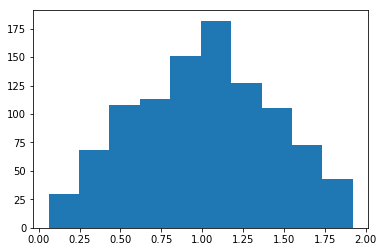

In [14]:
def random_sum(random_floats = 2):
    value = 0
    for generated_value in range(random_floats):
        value += random.random()
    return value

random_sums = []
sum_count = 1000

for random_val in range(sum_count):
    random_sums.append(random_sum())
    
plt.hist(random_sums)

# The Beta Distribution & Random Walks

The code seen below performs one function; for n walks, count how many times a random walk is positive, and divide it by the total time of the walk. Then return a list of all fractions resulting from the n runs.

In [19]:
def count_positive(n_walks = 100, n_steps = 1000):
    positive_fractions = []
    # We begin by iterating by the given number of walks
    for walk in range(n_walks):
        positive_counter = 0
        # Make a temporary variable for the walk in question
        current_walk = random_walk(n_steps)
        for value in current_walk:
            if value > 0:
                positive_counter += 1
        positive_fractions.append(positive_counter/n_steps)
    return positive_fractions

(array([ 6.01010101,  1.81818182,  1.56565657,  1.28282828,  1.01010101,
         1.2020202 ,  1.07070707,  0.80808081,  1.01010101,  0.91919192,
         0.84848485,  0.81818182,  0.91919192,  0.82828283,  0.74747475,
         0.76767677,  0.50505051,  0.73737374,  0.82828283,  0.54545455,
         0.67676768,  0.71717172,  0.67676768,  0.68686869,  0.61616162,
         0.51515152,  0.70707071,  0.58585859,  0.60606061,  0.74747475,
         0.68686869,  0.61616162,  0.83838384,  0.77777778,  0.66666667,
         0.5959596 ,  0.61616162,  0.73737374,  0.70707071,  0.6969697 ,
         0.74747475,  0.97979798,  0.87878788,  0.95959596,  0.98989899,
         1.1010101 ,  1.18181818,  1.5959596 ,  1.74747475,  2.60606061]),
 array([ 0.    ,  0.0198,  0.0396,  0.0594,  0.0792,  0.099 ,  0.1188,
         0.1386,  0.1584,  0.1782,  0.198 ,  0.2178,  0.2376,  0.2574,
         0.2772,  0.297 ,  0.3168,  0.3366,  0.3564,  0.3762,  0.396 ,
         0.4158,  0.4356,  0.4554,  0.4752,  0.495 ,  0

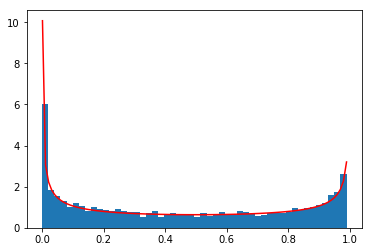

In [22]:
runs = 5000
steps = 100


arcsine_domain = np.linspace(0.001,1,steps, endpoint = False)
arcsine_range = []

def arcsine_distribution(x_val):
    return 1.0/(np.pi*np.sqrt(x_val*(1-x_val)))

for x_val in arcsine_domain:
    arcsine_range.append(arcsine_distribution(x_val))

plt.plot(arcsine_domain, arcsine_range, 'r-')
plt.hist(count_positive(runs, steps),bins=50,normed=True)